In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("./algoTrade/data/us_etf_data/AMZN.csv", index_col = 'Date', parse_dates = ["Date"])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [3]:
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("./algoTrade/data/ch03/AMZN_결측값.csv", index_col = 'Date', parse_dates = ["Date"])
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-21,NaN,1.645833,1.375000,1.427083,1.427083,18853200.0
1997-05-27,1.510417,NaN,1.458333,1.583333,1.583333,8697600.0
1997-06-02,1.510417,1.531250,NaN,1.510417,1.510417,591600.0
1997-06-11,1.593750,1.604167,1.531250,NaN,1.541667,1188000.0
1997-06-19,1.510417,1.531250,1.500000,1.510417,NaN,1003200.0
1997-06-24,1.505208,1.526042,1.479167,1.510417,1.510417,NaN
2000-07-14,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-25,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-22,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

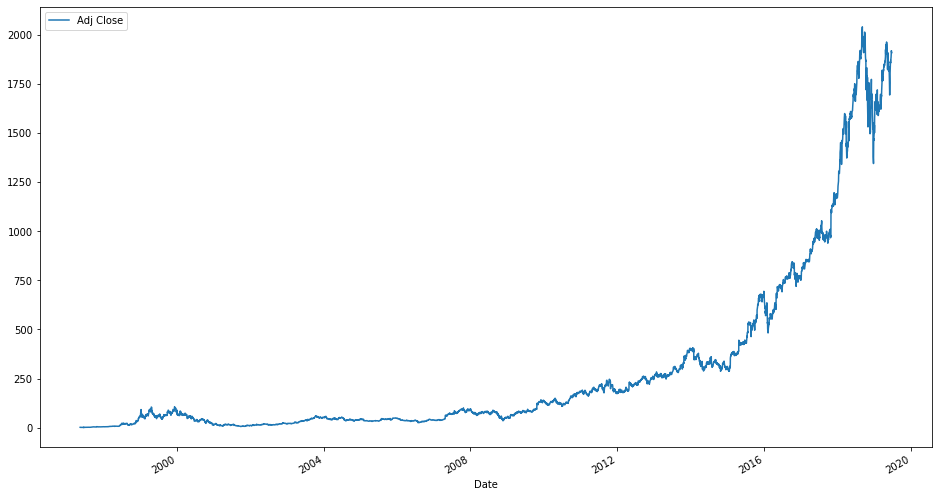

In [5]:
price_df = df.loc[:, ['Adj Close']].copy()
price_df.plot(figsize=(16,9))

<AxesSubplot:xlabel='Date'>

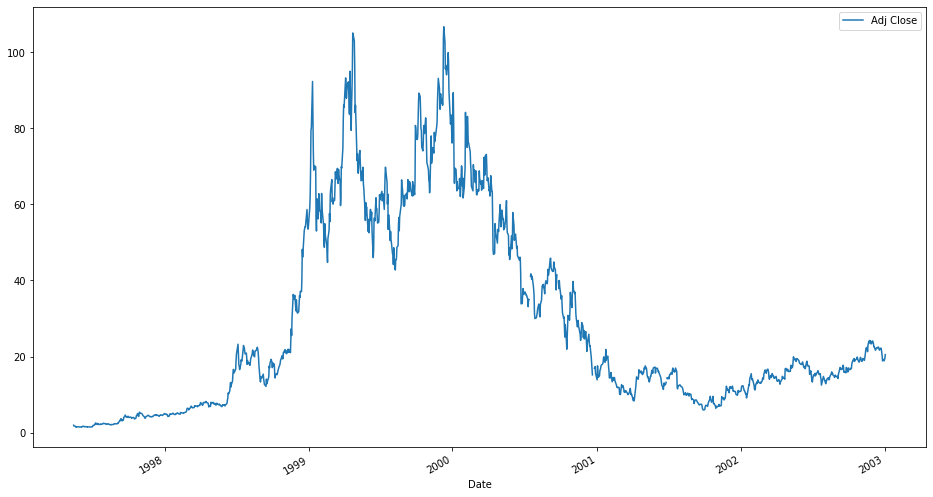

In [6]:
from_date = '1997-01-03'
to_date = '2003-01-03'
price_df.loc[from_date:to_date].plot(figsize=(16,9))

In [7]:
price_df['daily_rtn'] = price_df['Adj Close'].pct_change()
price_df.head(10)

,Adj Close,daily_rtn
Date,,
1997-05-15,1.958333,NaN
1997-05-16,1.729167,-0.117021
1997-05-19,1.708333,-0.012049
1997-05-20,1.635417,-0.042683
1997-05-21,1.427083,-0.127389
1997-05-22,1.395833,-0.021898
1997-05-23,1.500000,0.074627
1997-05-27,1.583333,0.055555
1997-05-28,1.531250,-0.032895


In [8]:
price_df['st_rtn'] = (1+price_df['daily_rtn']).cumprod()
price_df.head(10)

,Adj Close,daily_rtn,st_rtn
Date,,,
1997-05-15,1.958333,NaN,NaN
1997-05-16,1.729167,-0.117021,0.882979
1997-05-19,1.708333,-0.012049,0.872340
1997-05-20,1.635417,-0.042683,0.835107
1997-05-21,1.427083,-0.127389,0.728723
1997-05-22,1.395833,-0.021898,0.712766
1997-05-23,1.500000,0.074627,0.765958
1997-05-27,1.583333,0.055555,0.808511
1997-05-28,1.531250,-0.032895,0.781915


<AxesSubplot:xlabel='Date'>

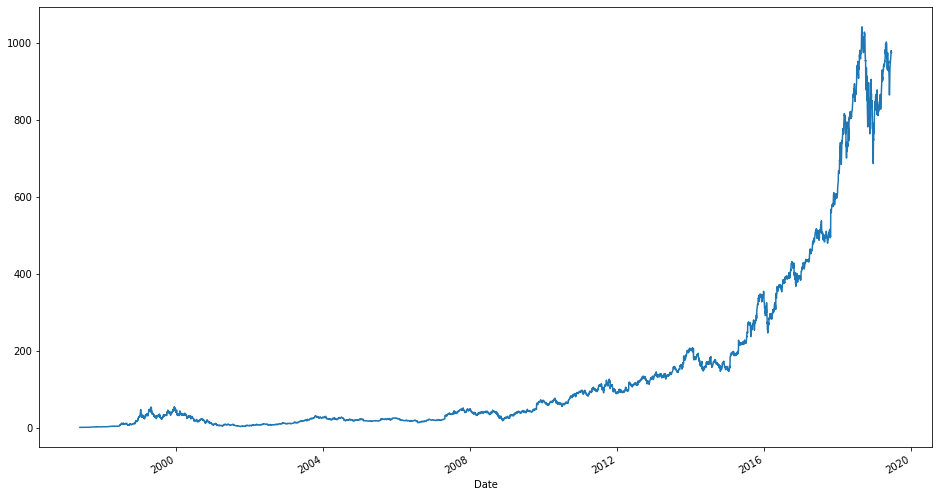

In [9]:
price_df['st_rtn'].plot(figsize = (16,9))

누적 수익 :  10.356931096748863


<AxesSubplot:xlabel='Date'>

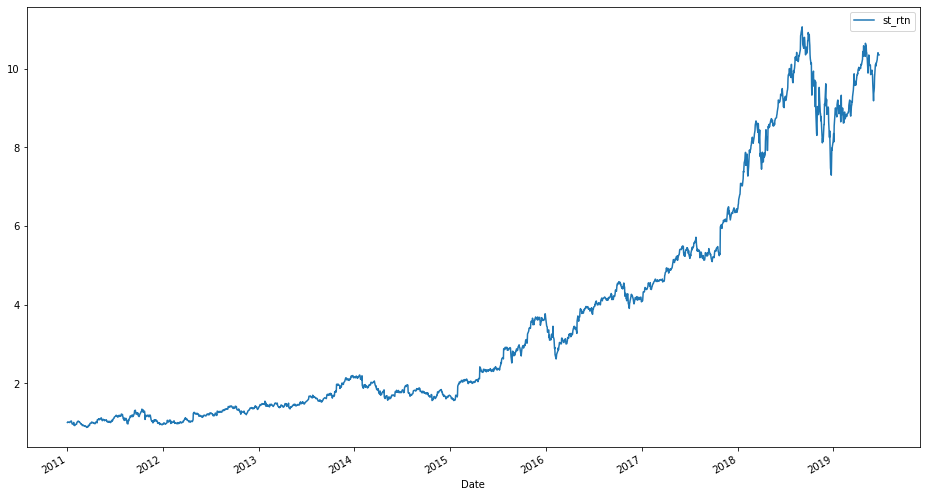

In [11]:

base_date = '2011-01-03'
tmp_df = price_df.loc[base_date:, ['st_rtn']] / price_df.loc[base_date, ['st_rtn']]
last_date = tmp_df.index[-1]
print('누적 수익 : ', tmp_df.loc[last_date, 'st_rtn'])
tmp_df.plot(figsize=(16,9))

## 3.2 투자 성과 분석 지표

In [15]:
CAGR = price_df.loc['2019-06-24', 'st_rtn'] ** (252./len(price_df.index)) - 1

<AxesSubplot:xlabel='Date'>

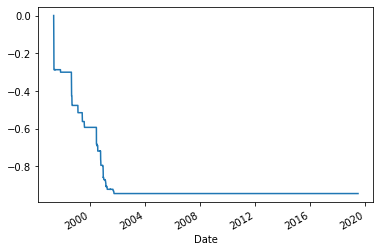

In [16]:
historical_max = price_df['Adj Close'].cummax()
daily_drawdown = price_df['Adj Close'] / historical_max - 1.0
historical_dd = daily_drawdown.cummin()
historical_dd.plot()

In [17]:
VOL = np.std(price_df['daily_rtn']) * np.sqrt(252.)

In [18]:
Sharpe = np.mean(price_df['daily_rtn']) / np.std(price_df['daily_rtn']) * np.sqrt(252.)

In [19]:
CAGR = price_df.loc['2019-06-24', 'st_rtn'] ** (252./len(price_df.index)) - 1
Sharpe = np.mean(price_df['daily_rtn']) / np.std(price_df['daily_rtn']) * np.sqrt(252.)
VOL = np.std(price_df['daily_rtn']) * np.sqrt(252.)
MDD = historical_dd.min()
print('CAGR : ', round(CAGR*100, 2), '%')
print('Sharpe : ', round(Sharpe, 2))
print('VOL : ', round(VOL*100, 2), '%')
print('MDD : ', round(-1*MDD*100, 2), '%')

CAGR :  36.58 %
Sharpe :  0.81
VOL :  60.04 %
MDD :  94.4 %
